<a href="https://colab.research.google.com/github/heena2248/Projects/blob/main/Coupon_Acceptance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coupon Acceptance Prediction
The project aims to apply machine learning methods to examine driving contexts and user traits obtained from an e-commerce platform. The goal is to predict the likelihood of users accepting coupons while traveling, thereby refining the strategy for coupon distribution and boosting user interaction with the platform’s services.

The data encompasses various driving contexts, such as the user’s intended destination, current time, weather conditions, companions, details about the coupon, and both user-specific and situational characteristics. Users are then asked whether they would accept the coupon under these specific conditions.

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:

#dataset
df = pd.read_csv("Coupon_Acceptance.csv")

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


The dataset includes 12684 records, with 25 columns in total. The Y variable is a binary variable. Hence, this is a binary classification problem.

In [ ]:
#removing duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(12684, 25)
(12393, 25)


In [ ]:
df['Accept(Y/N?)'].value_counts()

,count
Accept(Y/N?),
1,7012
0,5381


The dataset is not imbalanced.

In [ ]:
#Assessing the number of null values in each column
df.isnull().sum().sort_values(ascending = False)

,0
car,12287
CoffeeHouse,215
Restaurant20To50,188
CarryAway,148
RestaurantLessThan20,128
Bar,106
weather,0
passanger,0
destination,0
maritalStatus,0


In [ ]:
df.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

Car column has more than 90% as null. So the column needs to be dropped.

In [ ]:
df.drop(['car'], axis=1, inplace=True)

In [ ]:
#unique values in other columns with missing values
print("Unique values in CoffeeHouse:", df['CoffeeHouse'].unique())
print("Unique values in Restaurant20To50:", df['Restaurant20To50'].unique())
print("Unique values in CarryAway:", df['CarryAway'].unique())
print("Unique values in RestaurantLessThan20:", df['RestaurantLessThan20'].unique())
print("Unique values in Bar:", df['Bar'].unique())


Unique values in CoffeeHouse: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
Unique values in Restaurant20To50: ['1~3' 'less1' 'never' 'gt8' '4~8' nan]
Unique values in CarryAway: [nan '4~8' '1~3' 'gt8' 'less1' 'never']
Unique values in RestaurantLessThan20: ['4~8' '1~3' 'less1' 'gt8' nan 'never']
Unique values in Bar: ['never' 'less1' '1~3' 'gt8' nan '4~8']


Since all are categorical features, the missing values can be filled using mode.

In [ ]:
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)
#renaming the Y var
df.rename(columns={'Accept(Y/N?)': 'Accept'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null  obj

### Outlier analysis

Checking on outliers in numerical columns and number of unique values in categorical columns

In [ ]:
from scipy import stats
import statistics
def outlier_detect(col):
  # Calculate Z-scores
  l1=[]
  avg=col.mean()
  sd=statistics.stdev(col)
  for x in col:
    zs=(x-avg)/sd
    if(zs>3 or zs<-3):
      l1.append(x)
  print("Outliers:",l1)
outlier_detect(df['temperature'])
outlier_detect(df['has_children'])
outlier_detect(df['toCoupon_GEQ5min'])
outlier_detect(df['toCoupon_GEQ15min'])
outlier_detect(df['toCoupon_GEQ25min'])
outlier_detect(df['direction_same'])
outlier_detect(df['direction_opp'])

Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []


No outliers are detected.
Let's check for unique values in each column

In [ ]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object','category','int64','float64'])

# Create a DataFrame to store the number of unique values and the unique values themselves
unique_info = pd.DataFrame({
    'Column': categorical_columns.columns,
    'Unique Count': [categorical_columns[col].nunique() for col in categorical_columns],
    'Unique Values': [categorical_columns[col].unique().tolist() for col in categorical_columns]
})

# Display the result
print("Unique values and counts in each categorical column:")
print(unique_info)

Unique values and counts in each categorical column:
                  Column  Unique Count  \
0            destination             3   
1              passanger             4   
2                weather             3   
3            temperature             3   
4                 coupon             5   
5             expiration             2   
6                 gender             2   
7                    age             8   
8          maritalStatus             5   
9           has_children             2   
10             education             6   
11            occupation            25   
12                income             9   
13                   Bar             5   
14           CoffeeHouse             5   
15             CarryAway             5   
16  RestaurantLessThan20             5   
17      Restaurant20To50             5   
18      toCoupon_GEQ5min             1   
19     toCoupon_GEQ15min             2   
20     toCoupon_GEQ25min             2   
21        direction_sam

Since age has bins and values, we change to include 21 and 26 as "21-30", 31 and 36 as "31-40", 41 and 46 as "41-50"


In [ ]:
# Convert age column to numeric values where possible
# Replace '50plus' with a value that falls into the highest bin
df['age'] = df['age'].replace('50plus', 51)
df['age'] = df['age'].replace('below21', 20)
df['age']=df['age'].astype(float)
# Define bins and labels
bins = [0, 21, 30, 40, 50, float('inf')]  # Adjusted to include 'below21'
labels = ['below21', '21-30', '31-40', '41-50', '50plus']

# Bin the ages
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)



In [ ]:
df.education.unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

Occupation has several unique values, but all are different from each other. Hence, they cant be combined.

In [ ]:
df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

All the values are unique and exhaustive.

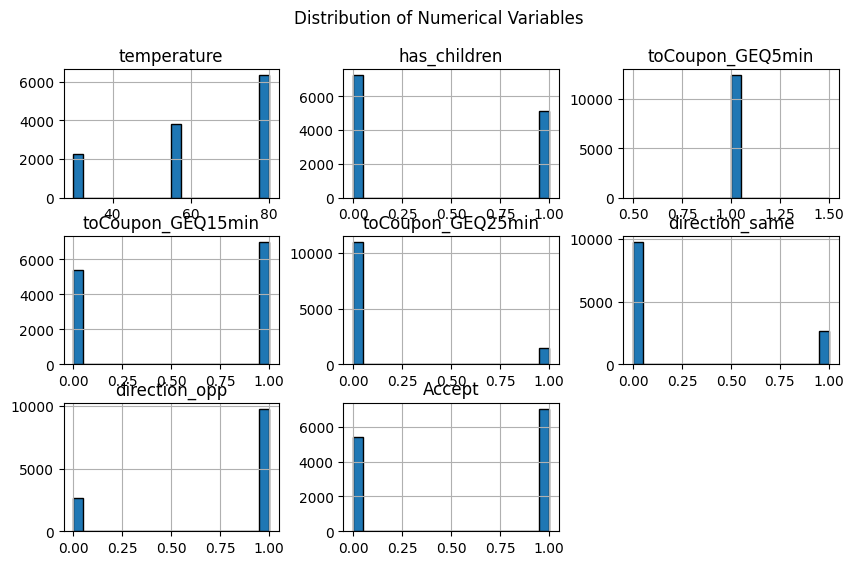

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
df.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

Though there are some numeric features, there are 2 or 3 values only. So, the feature can be typecasted to object itself. The column 'toCoupon_GEQ5min' can be removed bacuse there is only one value and shows no variability to contribute to the model.

In [ ]:
df = df.drop('toCoupon_GEQ5min', axis=1)

In [ ]:
# Convert all numeric columns to object type
numeric_cols = df.select_dtypes(include=['number','category']).columns
df[numeric_cols] = df[numeric_cols].astype('object')
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object
has_children,object


### EDA

Accept              0     1
destination                
Home             1567  1594
No Urgent Place  2253  3865
Work             1561  1553


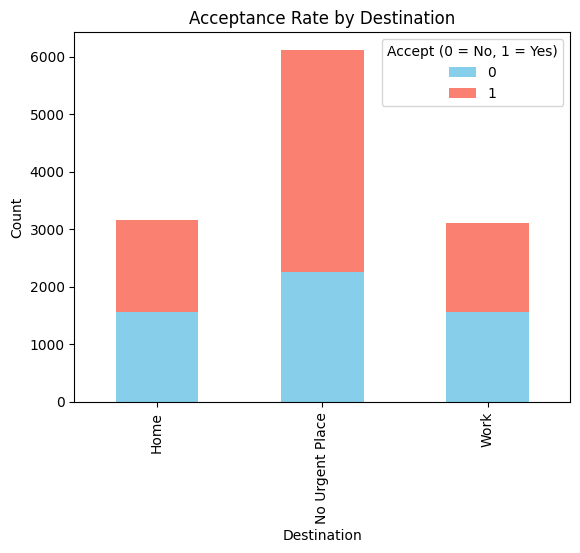

In [ ]:

# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['destination'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

The destination 'No Urgent Place' has a higher acceptance rate indicating people are more likely to accept when they travel other than home or work.

Accept          0     1
temperature            
30           1066  1171
55           1773  2055
80           2542  3786


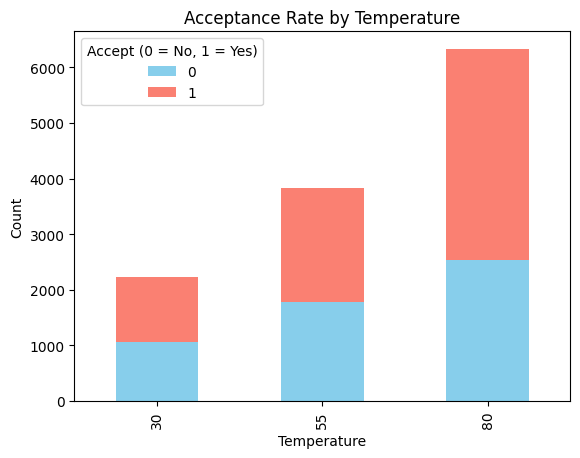

In [ ]:
# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['temperature'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

The temp 80F has a higher acceptance rate indicating people are more likely to accept during hotter weather.


Accept      0     1
weather            
Rainy     645   557
Snowy     724   605
Sunny    4012  5850


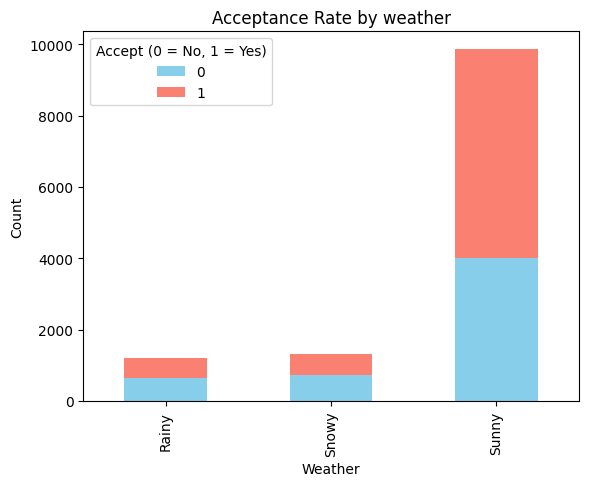

In [ ]:
# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['weather'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

The weather sunny has a higher acceptance rate indicating people are more likely to accept during hotter weather. This is same as indicated by temperature.

Accept        0     1
passanger            
Alone      3418  3760
Friend(s)  1039  2127
Kid(s)      490   491
Partner     434   634


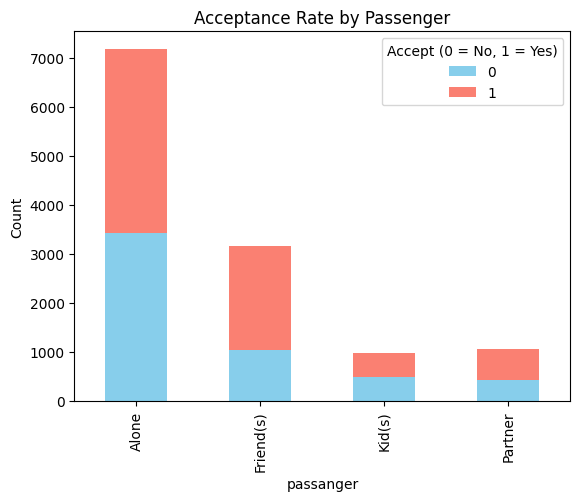

In [ ]:
# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['passanger'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by Passenger')
plt.xlabel('passanger')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

The tendency to pick on coupon is high when travelling with friends

Accept                    0     1
coupon                           
Bar                    1186   824
Carry out & Take away   610  1665
Coffee House           1970  1943
Restaurant(20-50)       831   656
Restaurant(<20)         784  1924


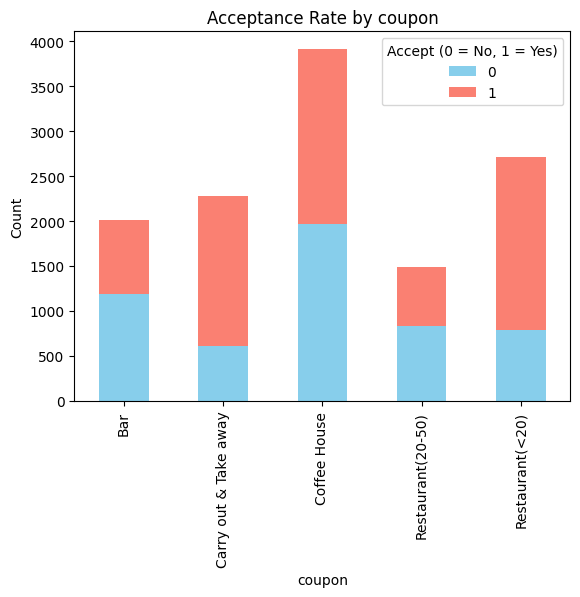

In [ ]:
# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['coupon'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by coupon')
plt.xlabel('coupon')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

The coupons 'carry out and take away' and 'restaurant<20' have higher acceptance rate

Accept                                     0     1
education                                         
Associates degree                        512   614
Bachelors degree                        1903  2344
Graduate degree (Masters or Doctorate)   854   939
High School Graduate                     361   519
Some High School                          25    62
Some college - no degree                1726  2534


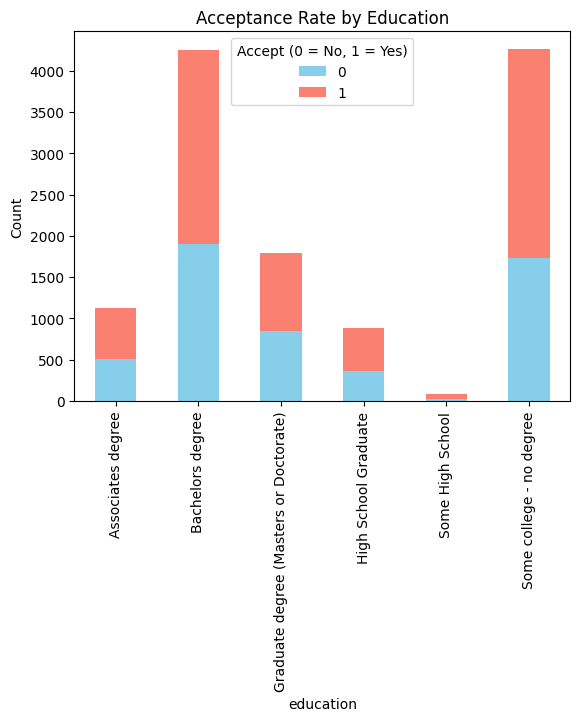

In [ ]:
# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['education'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by Education')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

Not much of coorelation is seen between education and acceptance.

Accept           0     1
has_children            
0             3009  4234
1             2372  2778


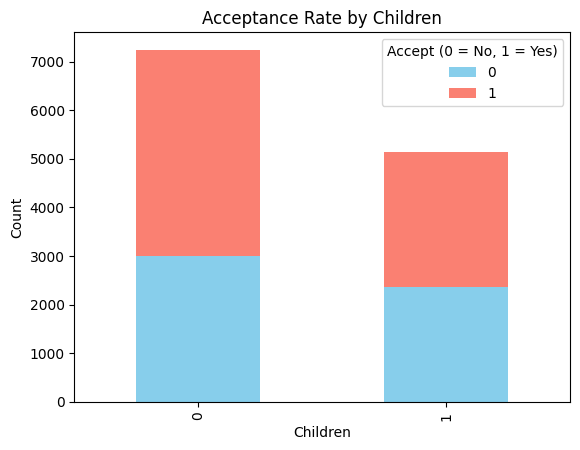

In [ ]:
# Create a cross-tabulation of counts
crosstab = pd.crosstab(df['has_children'], df['Accept'])

# Display the crosstab for reference
print(crosstab)
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Acceptance Rate by Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.legend(title='Accept (0 = No, 1 = Yes)')
plt.show()

The acceptance rate is better with people who have no children.

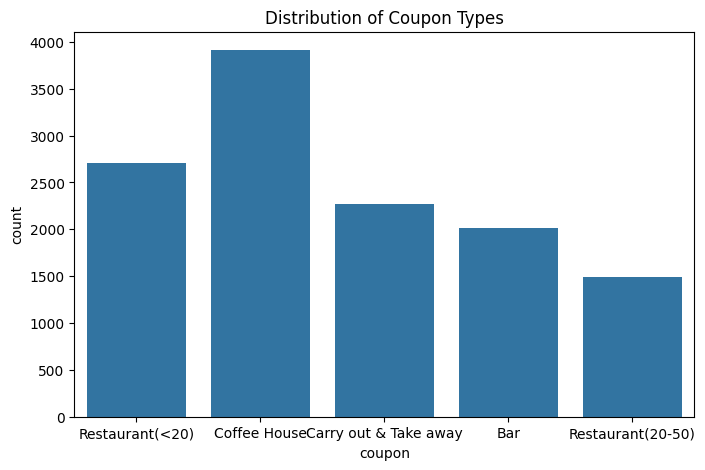

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'coupon' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='coupon')
plt.title('Distribution of Coupon Types')
plt.show()

Coffee House coupon is the highest given.

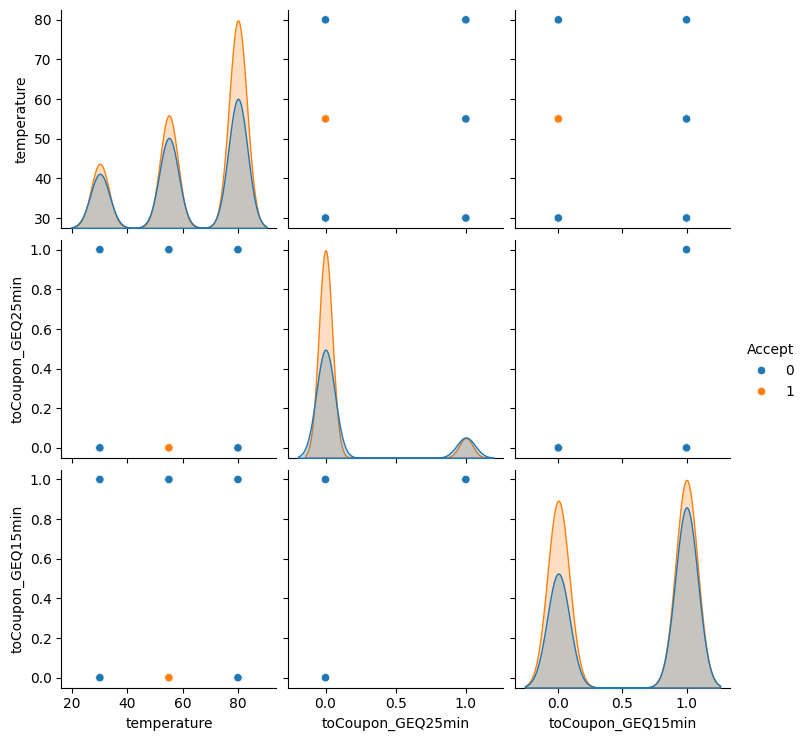

In [ ]:
# Pair plot for temperature, time to coupon, and acceptance
sns.pairplot(df[['temperature', 'toCoupon_GEQ25min', 'toCoupon_GEQ15min', 'Accept']], hue='Accept')
plt.show()

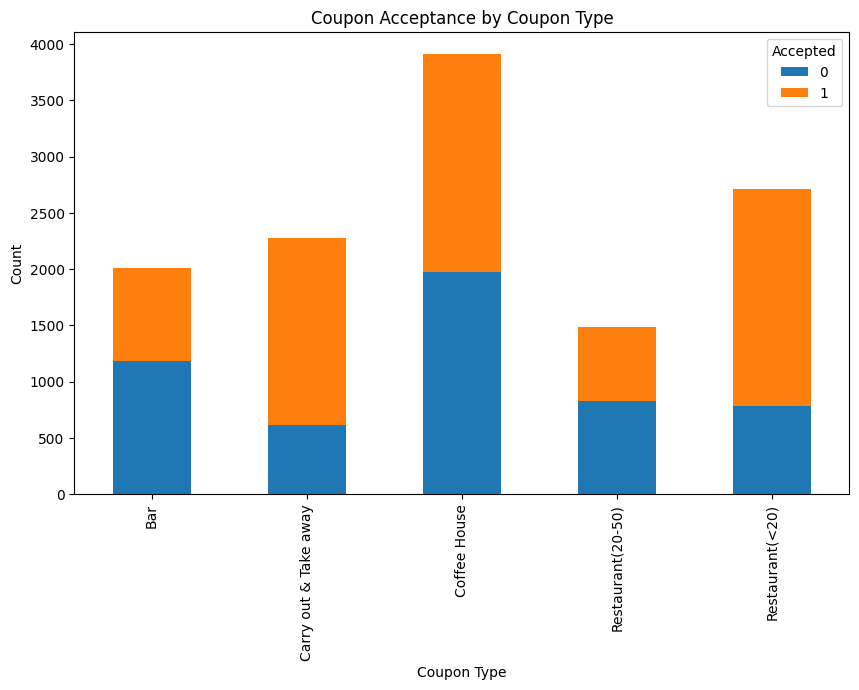

In [ ]:
# Stacked bar plot for 'coupon' and 'Accept(Y/N?)'
coupon_accept = pd.crosstab(df['coupon'], df['Accept'])
coupon_accept.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted', loc='upper right')
plt.show()

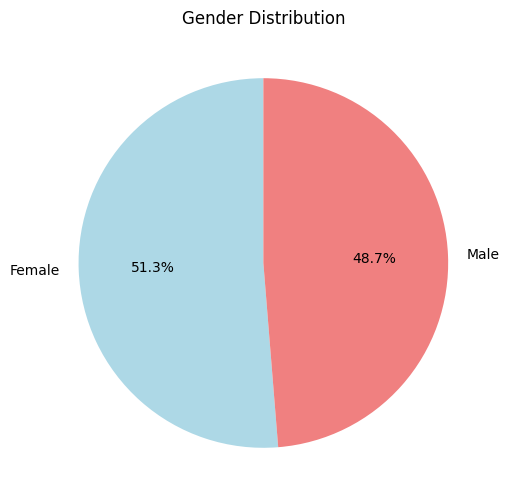

In [ ]:
# Pie chart for 'gender'
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

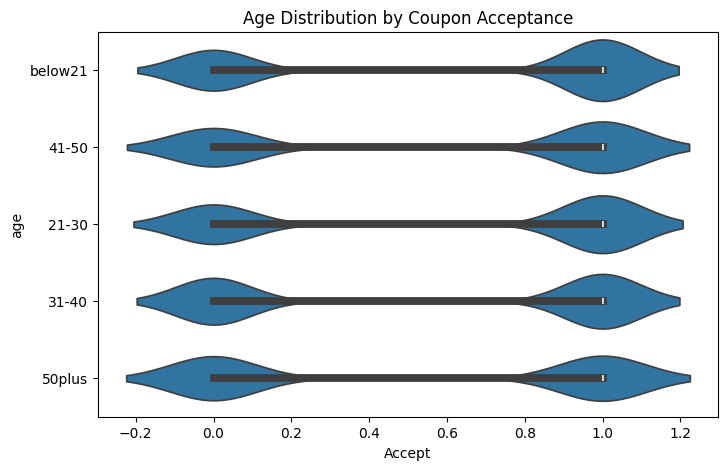

In [ ]:
# Violin plot to compare age distribution by coupon acceptance
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Accept', y='age')
plt.title('Age Distribution by Coupon Acceptance')
plt.show()

### FEATURE ENCODING:
OHE will be used for few and label encoding for few others.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  object
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  object
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null  obj

In [ ]:
# Define the manual mapping
manual_mapping = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

# Apply the manual mapping to the 'Bar' column
df['Bar'] = df['Bar'].map(manual_mapping)
df['CoffeeHouse'] = df['CoffeeHouse'].map(manual_mapping)
df['CarryAway'] = df['CarryAway'].map(manual_mapping)
df['Restaurant20To50'] = df['Restaurant20To50'].map(manual_mapping)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(manual_mapping)
mapping_age={
    'below21':0, '21-30':1, '31-40':2, '41-50':3, '50plus':4
}
df['age'] = df['age'].map(mapping_age)
mapping_temp={30:0,55:1,80:2}
df['temperature'] = df['temperature'].map(mapping_temp)
mapping_income={'Less than $12500':0,'$12500 - $24999':1,'$25000 - $37499':2,'$37500 - $49999':3,'$50000 - $62499':4,'$62500 - $74999':5,'$75000 - $87499':6,'$87500 - $99999':7,'$100000 or More':8}
df['income'] = df['income'].map(mapping_income)
mapping_education={'Some college - no degree':2, 'Bachelors degree':3,
       'Associates degree':4, 'High School Graduate':1,'Graduate degree (Masters or Doctorate)':5, 'Some High School':0}
df['education'] = df['education'].map(mapping_education)
df.columns
df.head()


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
0,No Urgent Place,Alone,Sunny,1,Restaurant(<20),1d,Female,0,Unmarried partner,1,...,0,0,2,3,2,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,2,Coffee House,2h,Female,0,Unmarried partner,1,...,0,0,2,3,2,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,2,Carry out & Take away,2h,Female,0,Unmarried partner,1,...,0,0,2,3,2,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,2,Coffee House,2h,Female,0,Unmarried partner,1,...,0,0,2,3,2,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,2,Coffee House,1d,Female,0,Unmarried partner,1,...,0,0,2,3,2,1,0,0,1,0


OHE

In [ ]:
# Apply one-hot encoding to the specified columns
df_ohe = pd.get_dummies(df[['destination', 'passanger','weather','coupon','expiration','gender','maritalStatus','occupation']],drop_first=True)
df.drop(['destination', 'passanger','weather','coupon','expiration','gender','maritalStatus','occupation'], axis=1, inplace=True)
# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, df_ohe], axis=1)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   temperature                                           12393 non-null  int64 
 1   age                                                   12393 non-null  int64 
 2   has_children                                          12393 non-null  object
 3   education                                             12393 non-null  int64 
 4   income                                                12393 non-null  int64 
 5   Bar                                                   12393 non-null  int64 
 6   CoffeeHouse                                           12393 non-null  int64 
 7   CarryAway                                             12393 non-null  int64 
 8   RestaurantLessThan20                                  12393 non-null  i

In [ ]:
# Convert all object-type columns to integers, if possible
for col in df.select_dtypes(include=['object','bool']).columns:
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        print(f"Column '{col}' could not be converted to integer due to non-numeric values.")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   temperature                                           12393 non-null  int64
 1   age                                                   12393 non-null  int64
 2   has_children                                          12393 non-null  int64
 3   education                                             12393 non-null  int64
 4   income                                                12393 non-null  int64
 5   Bar                                                   12393 non-null  int64
 6   CoffeeHouse                                           12393 non-null  int64
 7   CarryAway                                             12393 non-null  int64
 8   RestaurantLessThan20                                  12393 non-null  int64
 9   

In [ ]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Flatten the matrix and reset index to convert it to a DataFrame
corr_pairs = corr_matrix.unstack().reset_index()

# Rename columns for better readability
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Filter to keep only the desired correlations
filtered_corr_pairs = corr_pairs[(corr_pairs['Correlation'] > 0.7) | (corr_pairs['Correlation'] < -0.7)]

# Remove self-correlations and duplicate pairs
filtered_corr_pairs = filtered_corr_pairs[filtered_corr_pairs['Variable1'] != filtered_corr_pairs['Variable2']].drop_duplicates(subset=['Correlation'])

print("Pairs with correlation <-0.7 or >0.7:")
print(filtered_corr_pairs)


Pairs with correlation <-0.7 or >0.7:
          Variable1      Variable2  Correlation
685  direction_same  direction_opp         -1.0


In [ ]:
df = df.drop('direction_opp', axis=1)

In [ ]:
# Analyzing multcollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new = df
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
vif_data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new, i) for i in range(X_new.shape[1])]
vif_data['Multicolinear']=['yes' if vif_data['VIF'][i]>5 else 'no' for i in range(X_new.shape[1])]
vif_data

,feature,VIF,Multicolinear
0,temperature,7.416489,yes
1,age,4.877112,no
2,has_children,3.255462,no
3,education,8.690976,yes
4,income,4.428210,no
5,Bar,2.523286,no
6,CoffeeHouse,3.470004,no
7,CarryAway,10.354230,yes
8,RestaurantLessThan20,10.912986,yes
9,Restaurant20To50,4.243486,no


In [ ]:

columns_to_drop = vif_data[vif_data['Multicolinear'] == 'yes']['feature']


df = df.drop(columns=columns_to_drop)


print(df.shape)

(12393, 43)


### Model building

Dimensionality reduction is needed since there are 43 feature columns. There are various methods. We will try step wise regression. PCA creates new features, so the features contributing mostly to prediction are not deciphered. LDA is mostly helpful for multi- class classification. t-SNE is to be mostly used for image processing and NLP. There are other methods like Forward selection, backward elimination,  which select the best features possible instead of making combination of new features.

In [ ]:
# Prepare X and Y
y = df.loc[:, 'Accept']
X = df.drop(['Accept'], axis=1)   #PCA works only on predictor variables

print(df.shape)
df.head()


(12393, 43)


,age,has_children,income,Bar,CoffeeHouse,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept,...,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Transportation & Material Moving
0,0,1,3,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,0,0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,3,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,3,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# PCA
"""n_comp=20
pca = PCA(n_components = n_comp)
df_pca = pca.fit_transform(X=X)
type(df_pca)"""
"""df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #Less than (3147, 784)
df_pca.round(2).head()"""
"""v= pca.explained_variance_
v"""
"""variances = pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage = (variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,n_comp+1)
final= [r , variances[0], percentage[0], var[0] ]
final
df = pd.DataFrame(data = final)
df1=df.T
columns = ['PC#' , 'Variance', 'Percentage', 'Cumulative var']
df1.columns = columns
df1"""

"variances = pca.explained_variance_ratio_.round(4).reshape(1,-1)\npercentage = (variances*100).reshape(1,-1)\nvar=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)\nr=np.arange(1,n_comp+1)\nfinal= [r , variances[0], percentage[0], var[0] ]\nfinal\ndf = pd.DataFrame(data = final)\ndf1=df.T\ncolumns = ['PC#' , 'Variance', 'Percentage', 'Cumulative var']\ndf1.columns = columns\ndf1"

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:


# Initialize the Logistic Regression model
model = LogisticRegression()




# Fit the model on the training data
model.fit(X_train, y_train)

# Use the model trained with selected features to make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc)

Confusion Matrix:
[[ 637  473]
 [ 330 1039]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      1110
           1       0.69      0.76      0.72      1369

    accuracy                           0.68      2479
   macro avg       0.67      0.67      0.67      2479
weighted avg       0.67      0.68      0.67      2479


Accuracy Score:
0.6760790641387656

ROC AUC Score:
0.7229051915319263


#### Logistic Regression with RFE

In [ ]:



# Initialize the Logistic Regression model
model = LogisticRegression()



# Initialize RFE with the model and specify the number of features to select
# For example, if you want to select 2 features, set n_features_to_select=2
rfe = RFE(model, n_features_to_select=30)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)

# Print the rankings of the features and the selected features
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", X.columns[rfe.support_])


# Use the model trained with selected features to make predictions
y_pred = rfe.predict(X_test)
y_pred_proba = rfe.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc)

Feature Ranking:  [ 7 13 11  9  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  1  1  8  1  1 12  1  4  5  1  1  6  3]
Selected Features:  Index(['CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Partner', 'weather_Snowy',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'maritalStatus_Widowed',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       'occupation_Construction & Extraction',
       'occupation_Education&Training&Library',
       'occupation_Farming Fishing & Forestry',
       'occupation_Healthcare Practitioners & Technical',
       'occupation_Healthcare Su


#### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\n ROC_AUC")
print(roc_auc)

Confusion Matrix:
[[692 418]
 [413 956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1110
           1       0.70      0.70      0.70      1369

    accuracy                           0.66      2479
   macro avg       0.66      0.66      0.66      2479
weighted avg       0.66      0.66      0.66      2479


Accuracy Score:
0.6647841871722469

 ROC_AUC
0.6630183141505275


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nROC AUC Score:",roc_auc)

Confusion Matrix:
[[ 677  433]
 [ 279 1090]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1110
           1       0.72      0.80      0.75      1369

    accuracy                           0.71      2479
   macro avg       0.71      0.70      0.70      2479
weighted avg       0.71      0.71      0.71      2479


Accuracy Score:
0.7127874142799516

ROC AUC Score: 0.7672391895182253


Random Forest with hyperparameter tuning and RFE

In [ ]:
#  Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

#  Initialize RFE (feature selection)
# n_features_to_select specifies how many features you want to keep after RFE
rfe = RFE(estimator=rf, n_features_to_select=20, step=1)  # Selecting 10 most important features

# Fit RFE
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)  # Transform the test set based on the selected features

#  Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

#  Initialize GridSearchCV with Random Forest model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#  Fit GridSearchCV on the transformed dataset (with selected features)
grid_search.fit(X_train_rfe, y_train)

#  Get the best parameters
print("Best Parameters:", grid_search.best_params_)

#  Get the best model
best_rf = grid_search.best_estimator_

#  Predict on the testing data (transformed test set)
y_pred = best_rf.predict(X_test_rfe)
y_pred_proba = best_rf.predict_proba(X_test_rfe)[:, 1]

#  Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

#  Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
Confusion Matrix:
[[ 674  436]
 [ 280 1089]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.65      1110
           1       0.71      0.80      0.75      1369

    accuracy                           0.71      2479
   macro avg       0.71      0.70      0.70      2479
weighted avg       0.71      0.71      0.71      2479


Accuracy Score:
0.7111738604275918

ROC AUC Score:
0.7599744009897407


#### SVM

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)


y_pred = svc_model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
#  Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:", roc_auc)

Confusion Matrix:
 [[ 660  450]
 [ 307 1062]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.59      0.64      1110
           1       0.70      0.78      0.74      1369

    accuracy                           0.69      2479
   macro avg       0.69      0.69      0.69      2479
weighted avg       0.69      0.69      0.69      2479


Accuracy Score: 0.6946349334409035

ROC AUC Score: 0.7672391895182253


In [ ]:
X_train.columns

Index(['age', 'has_children', 'income', 'Bar', 'CoffeeHouse',
       'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'destination_Work', 'passanger_Friend(s)',
       'passanger_Kid(s)', 'passanger_Partner', 'weather_Snowy',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'maritalStatus_Widowed',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       'occupation_Construction & Extraction',
       'occupation_Education&Training&Library',
       'occupation_Farming Fishing & Forestry',
       'occupation_Food Preparation & Serving Related',
       'occupation_Healthcare Practitioners & Technical',
       'occupation_Healthcare Support',
       'occupation_Installation Main

In [ ]:
X_train.rename(columns={'coupon_Restaurant(<20)': 'coupon_Restaurant(lt20)'}, inplace=True)
X_test.rename(columns={'coupon_Restaurant(<20)': 'coupon_Restaurant(lt20)'}, inplace=True)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier
# Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=False, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc)

Confusion Matrix:
[[ 601  509]
 [ 250 1119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.54      0.61      1110
           1       0.69      0.82      0.75      1369

    accuracy                           0.69      2479
   macro avg       0.70      0.68      0.68      2479
weighted avg       0.70      0.69      0.69      2479


Accuracy Score:
0.6938281565147236

ROC AUC Score:
0.7535177251758698


#### XGBoost

In [ ]:
from xgboost import XGBClassifier
# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc)

Confusion Matrix:
[[ 711  399]
 [ 275 1094]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1110
           1       0.73      0.80      0.76      1369

    accuracy                           0.73      2479
   macro avg       0.73      0.72      0.72      2479
weighted avg       0.73      0.73      0.73      2479


Accuracy Score:
0.7281161758773699

ROC AUC Score:
0.793577543942774


#### XGBoost with RFE

In [ ]:
from xgboost import XGBClassifier
# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# For example, if you want to select 2 features, set n_features_to_select=2
rfe = RFE(model, n_features_to_select=30)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)

# Print the rankings of the features and the selected features
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", X.columns[rfe.support_])


# Use the model trained with selected features to make predictions
y_pred = rfe.predict(X_test)
y_pred_proba = rfe.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc)

Feature Ranking:  [ 1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1 10  1 13  6
  4  3  1 12  1  1  1  9  1  1  1  1  8  5 11  1  1  7]
Selected Features:  Index(['age', 'has_children', 'income', 'Bar', 'CoffeeHouse',
       'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'destination_Work', 'passanger_Friend(s)',
       'passanger_Partner', 'weather_Snowy', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'expiration_2h', 'gender_Male',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Education&Training&Library',
       'occupation_Food Preparation & Serving Related',
       'occupation_Healthcare Practitioners & Technical',
       'occupation_Healthcare Support', 'occupation_Legal',
       'occupation_Life Physical Social Science', 'occupation_Management',
       'occupation_Office & Administrative Support', 'occupation_Retired',


#### Hyperparameter tuning on XGBoost with RFE

In [ ]:
# Initialize the XGBoost regressor
model = XGBClassifier(random_state=42)

# # Perform RFE with XGBoost
rfe = RFE(estimator=model, n_features_to_select=20)  # Select 2 best features
rfe = rfe.fit(X_train, y_train)

# Select the features using the boolean mask
X_train_selected = X_train.loc[:, rfe.support_]
X_test_selected = X_test.loc[:, rfe.support_]

# Proceed with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearch on the selected features from RFE
grid_search.fit(X_train_selected, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with best parameters
final_model = XGBClassifier(**best_params)
final_model.fit(X_train_selected, y_train)

# Predict on the test set with the selected features
y_pred = final_model.predict(X_test_selected)


y_pred_proba = final_model.predict_proba(X_test_selected)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Confusion Matrix:
[[ 708  402]
 [ 260 1109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1110
           1       0.73      0.81      0.77      1369

    accuracy                           0.73      2479
   macro avg       0.73      0.72      0.73      2479
weighted avg       0.73      0.73      0.73      2479


Accuracy Score:
0.7329568374344494

ROC AUC Score:
0.7925476608822116


In [ ]:
print("\nROC AUC Score:")
print(roc_auc)


ROC AUC Score:
0.7925476608822116


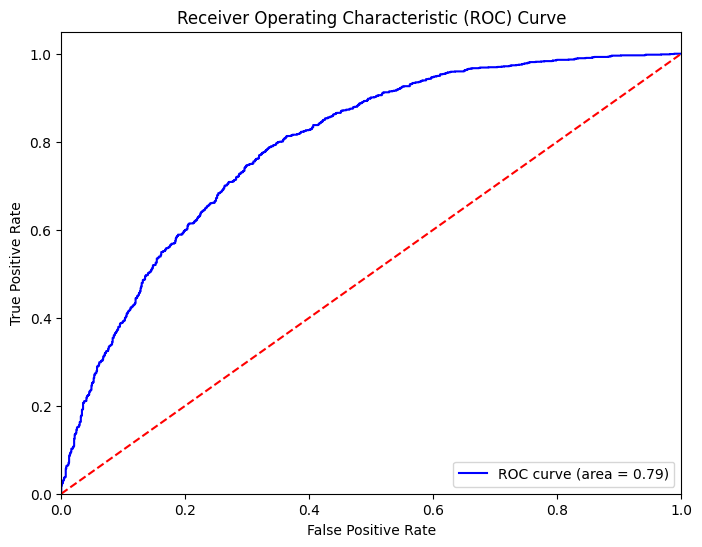

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The above model has yielded the best accuracy so far.

#### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Initialize base estimator (Decision Tree in this case)
base_estimator = DecisionTreeClassifier()

#  Initialize and train the Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_estimator,
                                  n_estimators=50,  # Number of base estimators
                                  random_state=42,
                                  max_samples=0.8,  # Fraction of samples to draw from X to train each base estimator
                                  max_features=0.8)  # Fraction of features to draw from X to train each base estimator

bagging_model.fit(X_train, y_train)

#  Make predictions
y_pred = bagging_model.predict(X_test)
y_pred_proba = rfe.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

#  Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:", roc_auc)

Confusion Matrix:
 [[ 684  426]
 [ 249 1120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67      1110
           1       0.72      0.82      0.77      1369

    accuracy                           0.73      2479
   macro avg       0.73      0.72      0.72      2479
weighted avg       0.73      0.73      0.72      2479


Accuracy Score: 0.7277127874142799

ROC AUC Score: 0.7886301568186156


#### Bagging Classifier with hyperparameter Tuning

In [ ]:
#  Initialize Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

#  Set up hyperparameter grid
param_grid = {
    'n_estimators': [ 50, 100],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.7],  # Fraction of samples to draw for training each base estimator
    'max_features': [0.5, 0.7],  # Fraction of features to draw for training each base estimator
    'base_estimator__max_depth': [ 10, 20, 30]  # Max depth of the decision tree
}

#  Set up GridSearchCV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

#  Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

#  Get the best parameters
print("Best Parameters:", grid_search.best_params_)

#  Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = rfe.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
#  Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC_AUC",roc_auc)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'base_estimator__max_depth': 20, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}

Accuracy Score: 0.7216619604679306

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.66      1110
           1       0.71      0.83      0.77      1369

    accuracy                           0.72      2479
   macro avg       0.72      0.71      0.71      2479
weighted avg       0.72      0.72      0.72      2479


ROC_AUC 0.7886301568186156


#### Stacking classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
#  Initialize the base models with best hyperparameters
rf = RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=150, random_state=42)
xgb = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8, random_state=42)
bc=BaggingClassifier(base_estimator=base_estimator, max_features=0.5, max_samples=0.5, n_estimators=100)

#  Initialize the meta-classifier (Logistic Regression)
meta_clf = LogisticRegression()

#  Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb),('bc',bc)], final_estimator=meta_clf)

# Train the stacking model
stacking_model.fit(X_train, y_train)

#  Make predictions
y_pred = stacking_model.predict(X_test)
y_pred_proba = rfe.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
#  Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:", roc_auc)


Confusion Matrix:
 [[ 704  406]
 [ 251 1118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1110
           1       0.73      0.82      0.77      1369

    accuracy                           0.73      2479
   macro avg       0.74      0.73      0.73      2479
weighted avg       0.74      0.73      0.73      2479


Accuracy Score: 0.7349737797498992

ROC AUC Score: 0.7886301568186156


XGBoost has shown the best accuracy of 73% and ROC AUC score of 80% and F1-score is also good compared to other models




In the context of the coupon acceptance prediction problem, where:

1 indicates that the user accepted the coupon,
0 indicates that the user did not accept the coupon,
precision and recall provide useful insights into the performance of the model. Here's how to interpret them in your case:

1. Precision:
Precision tells you how many of the predicted positive cases (users predicted to accept the coupon) were actually correct.


High Precision: A high precision means that when your model predicts that a user will accept a coupon (positive class, 1), it is correct in most cases. It minimizes False Positives (cases where the model predicts 1, but the actual label is 0).

Low Precision: If precision is low, it means that when your model predicts 1 (coupon accepted), it is often wrong, resulting in many False Positives.

In the context of coupon acceptance:

High precision means the model is good at accurately predicting that a user will accept a coupon, without falsely predicting acceptance when the user does not accept it.
2. Recall:
Recall (or Sensitivity) measures how many of the actual positive cases (users who actually accepted the coupon) were correctly identified by the model.


High Recall: A high recall means that the model successfully identifies most of the users who accepted the coupon, reducing False Negatives (cases where the model predicts 0 but the actual label is 1).

Low Recall: If recall is low, the model is missing many of the actual coupon acceptances, resulting in many False Negatives.

In the context of coupon acceptance:

High recall means that the model is good at detecting most users who actually accepted the coupon.

Trade-off Between Precision and Recall:

High Precision and Low Recall: The model is conservative in predicting coupon acceptance and predicts it only when it is very certain, but it might miss some cases (higher false negatives). This means the model is identifying a smaller group of users as accepting coupons, but it is confident they will accept.

High Recall and Low Precision: The model is liberal in predicting coupon acceptance, meaning it predicts more users will accept the coupon, but it makes more mistakes, leading to more false positives (incorrectly predicting acceptance for some users who won't accept).

Example Interpretation:
Let’s say you calculate:

Precision = 0.85: Out of all the users the model predicted would accept the coupon, 85% actually accepted it.
Recall = 0.65: Out of all the users who actually accepted the coupon, the model correctly identified 65% of them.
In this case, the model is accurate when it predicts coupon acceptance, but it misses a significant number of users who actually accept the coupon (False Negatives). We can adjust the model based on the business goal:

If it's more important to avoid annoying users with unnecessary coupons (i.e., focus on precision), you’d favor high precision.
If it's more important to capture as many potential acceptances as possible (i.e., focus on recall), you’d favor high recall.

Conclusion:
Precision is about the quality of the positive predictions (how accurate the "accept" predictions are).
Recall is about covering all the actual positives (how many of the actual "accepts" are correctly found).


A balanced model typically aims for a good trade-off between precision and recall, or uses metrics like the F1-score, which combines both into a single value. The specific importance of precision or recall depends on your business objective for coupon distribution.